## *****DATA PREPROCESSING*****

STEPS:
1.IMPORting libraries

2.IMport data set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing Data set

In [ ]:
dataset=pd.read_csv('/content/NewspaperData.csv')

eg:problem statement wheather a person purchase based on country age and salary

In [ ]:
dataset.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


Here indipendent variable=(country,age,salary)

In [ ]:
X=dataset.iloc[:,1].values
y=dataset.iloc[:,2].values

iloc-helps to get index position 
[:-select all rows
,:-select all columns
[:,:-1]-all columns except the last
.value-to show all the value including nan

In [ ]:
y

array([ 488.506,  798.298,  235.084,  299.451,  559.093, 1133.249,
        348.744,  417.779,  344.522,  323.084,  620.752,  423.305,
        202.614, 1531.527,  553.479,  685.975,  324.241,  983.24 ,
       1762.015,  960.308,  284.611,  407.76 ,  982.663,  557.   ,
        440.923,  268.06 ,  262.048,  432.502,  338.355,  704.322,
        585.681,  267.781,  408.343, 1165.567])

In [ ]:
X

array([ 391.952,  516.981,  355.628,  238.555,  537.78 ,  733.775,
        198.832,  252.624,  206.204,  231.177,  449.755,  288.571,
        185.736, 1164.388,  444.581,  412.871,  272.28 ,  781.796,
       1209.225,  825.512,  223.748,  354.843,  515.523,  220.465,
        337.672,  197.12 ,  133.239,  374.009,  273.844,  570.364,
        391.286,  201.86 ,  321.626,  838.902])

Handling Missing Data

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(X[:,1:3])
X[:,1:3]=imputer.transform(X[:,1:3])

Encoding categorical Data


In [ ]:
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [ ]:
#Encoding the dependent variale
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)

In [ ]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

Splitting the Dataset

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X_test

array([288.571, 223.748, 197.12 , 781.796, 355.628, 133.239, 201.86 ])

In [ ]:
X_train

array([ 272.28 ,  449.755,  838.902,  391.286,  337.672,  412.871,
        206.204, 1164.388,  273.844,  733.775,  444.581,  570.364,
        515.523,  516.981,  185.736,  198.832,  220.465,  537.78 ,
       1209.225,  354.843,  825.512,  231.177,  252.624,  321.626,
        374.009,  238.555,  391.952])

Fitting the model and visualisation


In [ ]:
import statsmodels.formula.api as smf
model=smf.ols("sunday~daily",data=dataset).fit()

In [ ]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300])
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [ ]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64

Visualisation


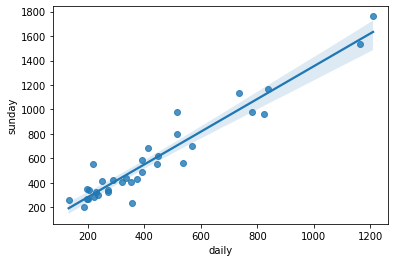

In [ ]:
import seaborn as sns
sns.regplot(x='daily',y='sunday',data=dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


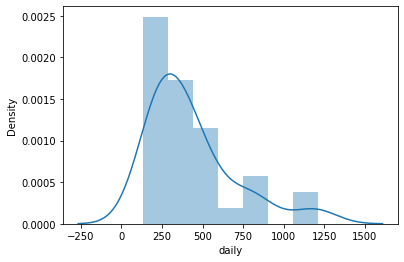

In [ ]:
sns.distplot(dataset['daily'])